In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway

# Read and Load Data

In [5]:
df = pd.read_csv('clean kaggle data.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Exploratory data analysis

[3pts] Perform exploratory data analysis to analyze the survey dataset and to summarize its main characteristics. Present 3 graphical figures that represent different trends in the data. For your explanatory data analysis, you can consider Country, Age, Education, Professional Experience, and Salary.

Plot the Boxplot between Age group and Salary

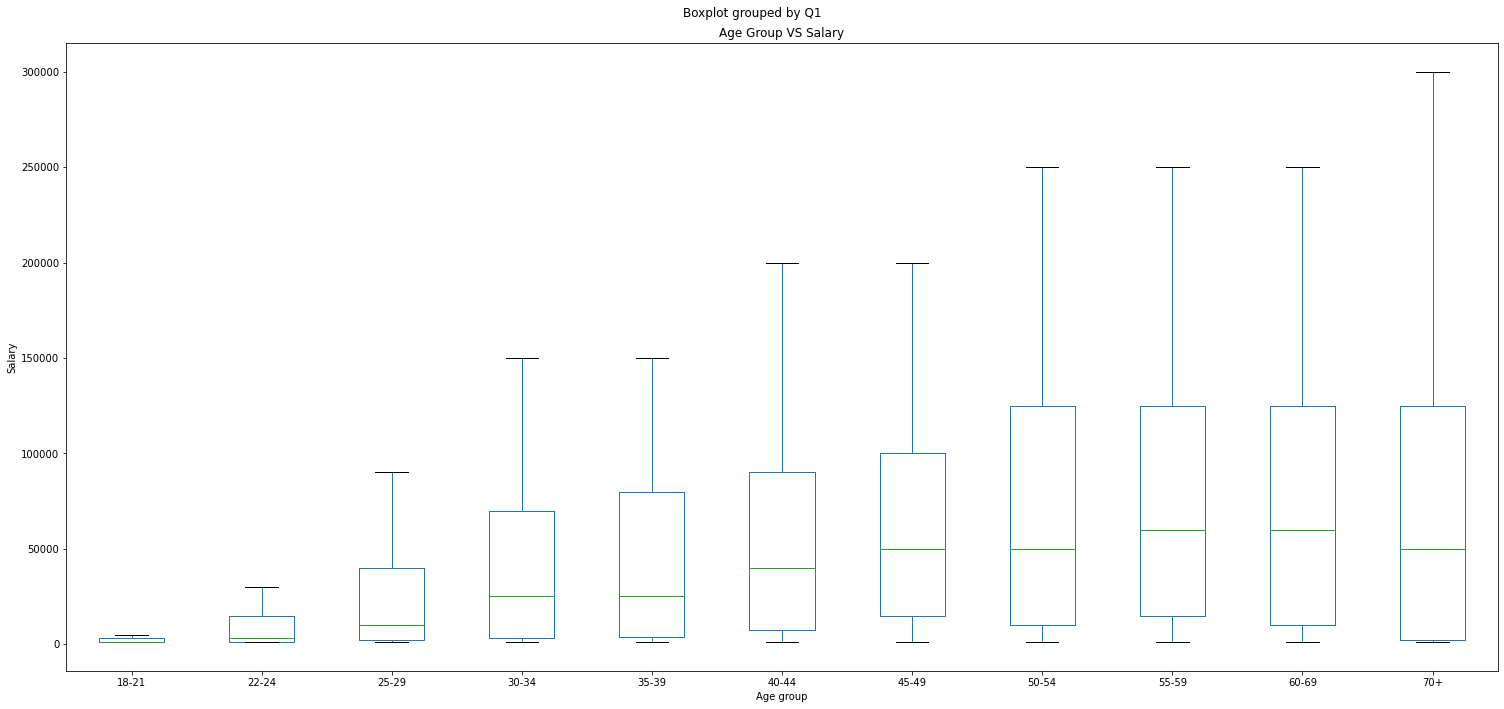

In [3]:
df_age_salary = df[['Q1','Q25']]
df_age_salary.boxplot(column='Q25', by='Q1', grid = False, showfliers=False, figsize = (21,10))
plt.xlabel('Age group')
plt.ylabel('Salary')
plt.title('Age Group VS Salary')
plt.tight_layout()
plt.show()

Plot the Boxplot between Highest Education level and Salary

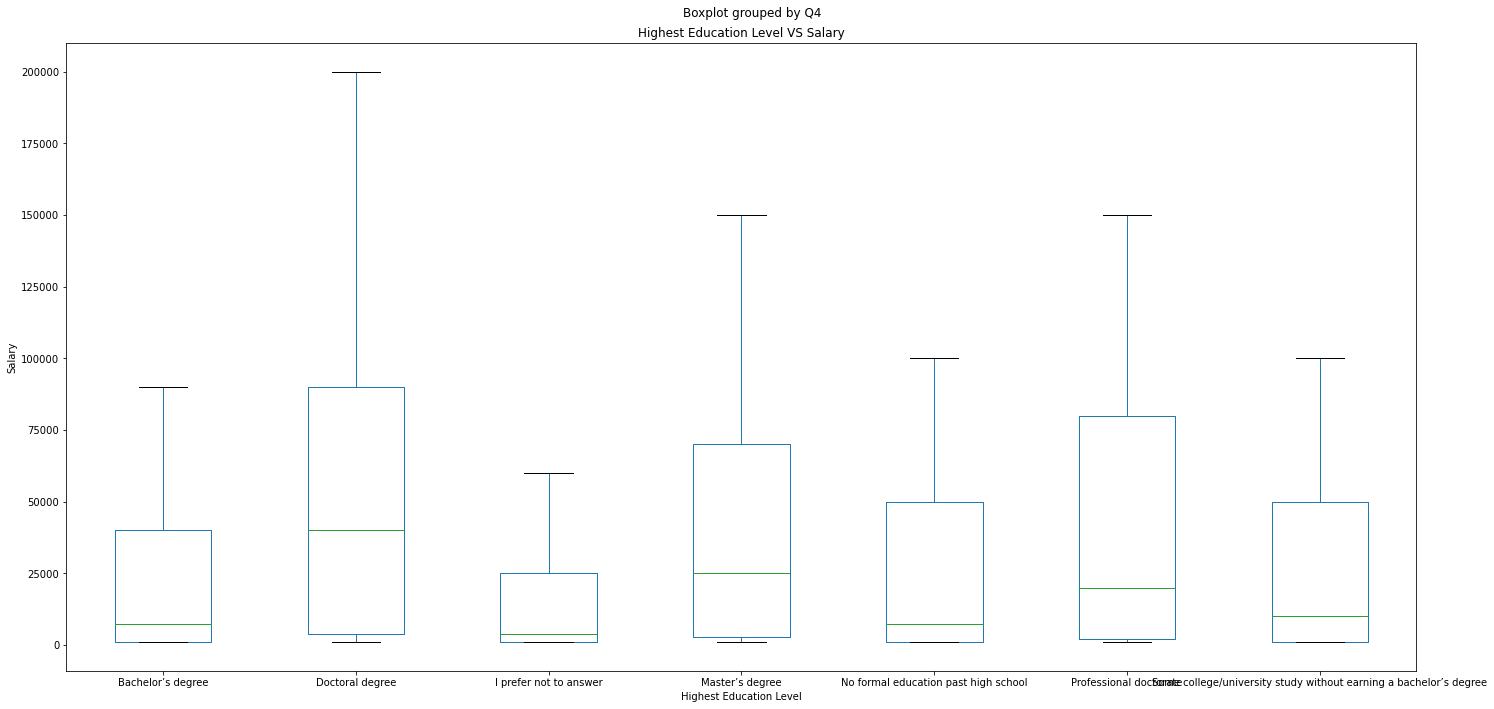

In [4]:
df_edu_salary = df[['Q4','Q25']]
df_edu_salary.boxplot(column='Q25', by='Q4', grid = False, showfliers=False, figsize = (21,10))
plt.xlabel('Highest Education Level')
plt.ylabel('Salary')
plt.title('Highest Education Level VS Salary')
plt.tight_layout()
plt.show()

Plot the Boxplot between Professional Experience and Salary

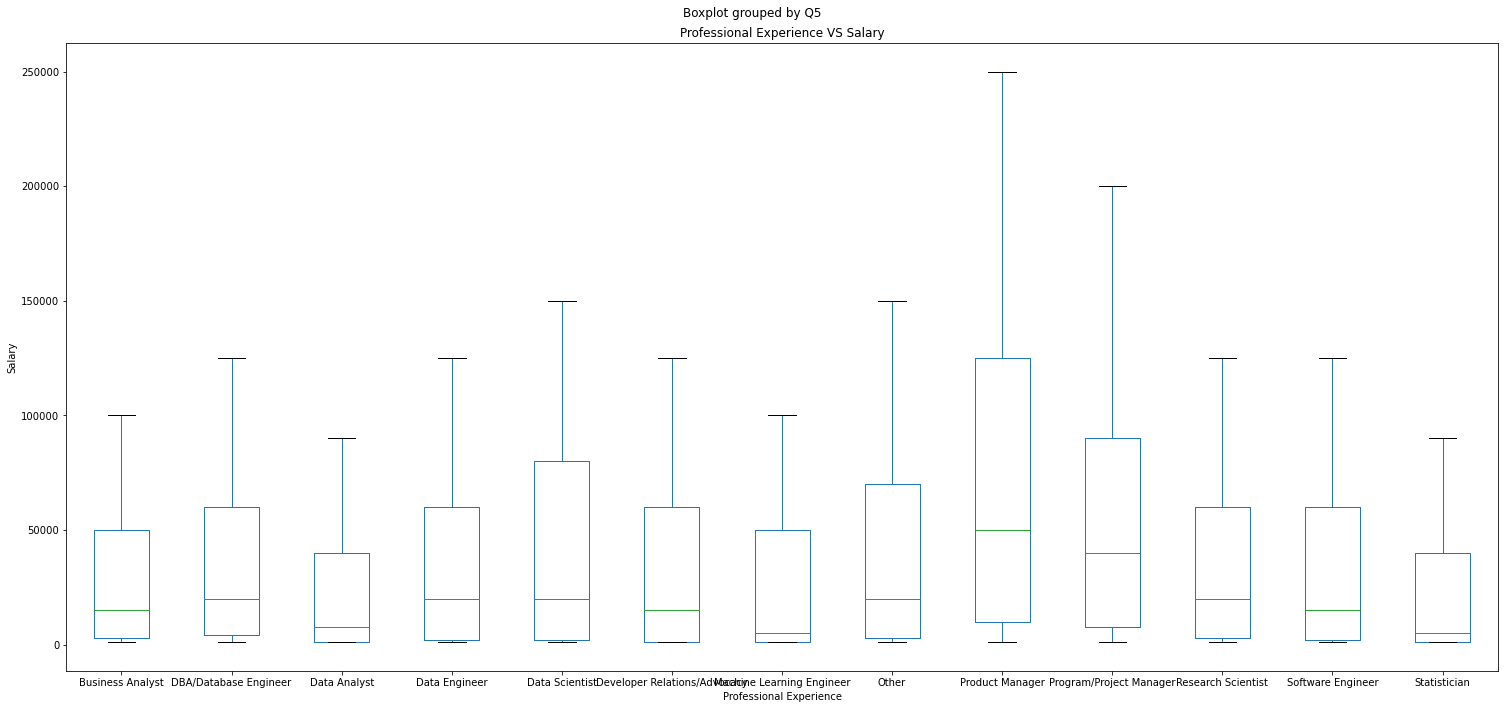

In [5]:
df_age_salary = df[['Q5','Q25']]
df_age_salary.boxplot(column='Q25', by='Q5', grid = False, showfliers=False, figsize = (21,10))
plt.xlabel('Professional Experience')
plt.ylabel('Salary')
plt.title('Professional Experience VS Salary')
plt.tight_layout()
plt.show()

# Difference between average salary (Q25) of men vs. women (Q2).

## a.[0.5pts] Compute and report descriptive statistics for each group (remove missing data, if necessary).

Build new DataFrame for each group.

In [6]:
df_man = df[['Q2','Q25']].loc[df.Q2 == 'Man']
df_woman = df[['Q2','Q25']].loc[df.Q2 == 'Woman']

Check wheather there is missing data

In [7]:
print(pd.isnull(df_man).sum())
print(pd.isnull(df_woman).sum())

Q2     0
Q25    0
dtype: int64
Q2     0
Q25    0
dtype: int64


So there is no missing data

Compute and report the descriptive statistics

In [8]:
df_man.describe()

,Q25
count,12642.000000
mean,51193.600696
std,99979.274378
min,1000.000000
25%,2000.000000
50%,20000.000000
75%,60000.000000
max,1000000.000000


Man group:

Size: 12642

Mean: 51193.600696

Standard deviation: 99979.274378

Median: 20000

Max: 1000000

Min: 1000

In [9]:
df_woman.describe()

,Q25
count,2482.000000
mean,34816.881547
std,72017.347888
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,50000.000000
max,1000000.000000


Woman group:

Size: 2482

Mean: 34816.881547

Standard deviation: 72017.347888

Median: 7500

Max: 1000000

Min: 1000

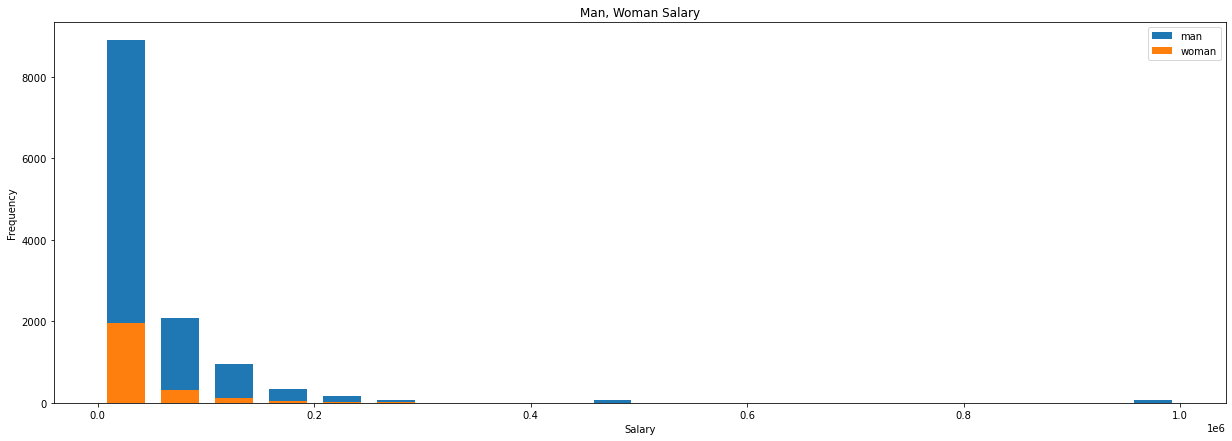

In [10]:
# Plot two distributions together in one graph
plt.figure(figsize = (21,7))
plt.hist(df_man.Q25, bins = 20,rwidth = 0.7, label = 'man')
plt.hist(df_woman.Q25, bins = 20,rwidth = 0.7, label = 'woman')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Man, Woman Salary')
plt.legend()
plt.show()

In [11]:
df_man.Q25.mean() > df_woman.Q25.mean()

True

In [12]:
df_man.Q25.median() > df_woman.Q25.median()

True

In [13]:
df_man.Q25.std() > df_woman.Q25.std()

True

In [14]:
print(df_man.Q25.min() == df_woman.Q25.min())
print(df_man.Q25.max() == df_woman.Q25.max())

True
True


In [15]:
print(df_man.Q25.max() - df_man.Q25.min())

999000


We can see from the histogram above that both of the man and woman salary distribution are right-skewed.

Man's group has larger mean(51193), median(20000) and standard deviation(variance) than woman's group.
Both men and woman groups' salary have same range which equals to 999000 (ie. same minimum and maximum value).

In summary, men have overall higher salay than women have.

## b. [0.5pts] If suitable, perform a two-sample t-test with a 0.05 threshold. Explain your rationale.

Since we can see from the histograms above that both of the man and woman salary distribution are right-skewed,  not Normal distribution. 

So it is not suitable to perform a two-sample t-test on them.


## c. [1.5pts] Bootstrap your data for comparing the mean of salary (Q25) for the two groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and the distribution of the difference in means.

In [16]:
print(df_man.shape)
print(df_woman.shape)

(12642, 2)
(2482, 2)


The higher the sample size, the more likely the sample will be representative of the population set.
Since man group has a large size:12642. It is reasonable that we take about 20% of the population as sample size (sample size: 2500).

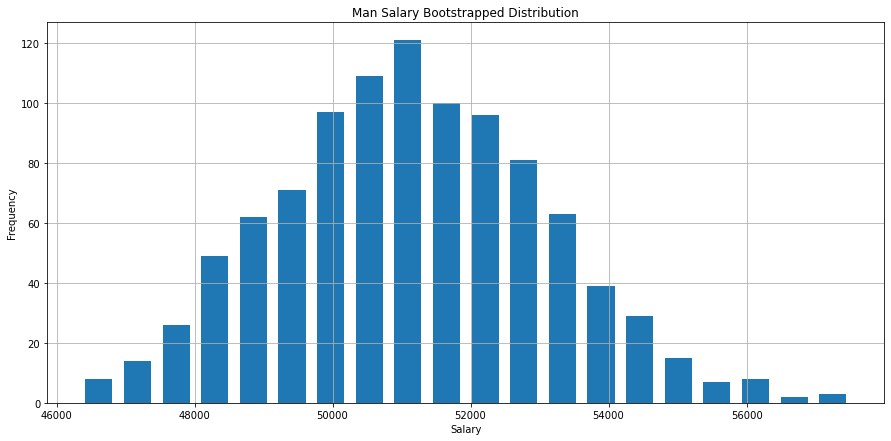

In [17]:
man_mean = []
for i in range(1000):
    np.random.seed(i) 
    # ensure that the results are the same each time 
    # so can we can analyze the result better/consistently
    sample_set = np.random.choice(df_man.Q25, size = 2500, replace = True)
    man_mean.append(sample_set.mean())

# Bootstrapped distribution for Men
plt.figure(figsize = (15,7))
plt.hist(man_mean, bins = 20,rwidth = 0.7)
plt.grid()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Man Salary Bootstrapped Distribution')
plt.show()

The higher the sample size, the more likely the sample will be representative of the population set.
Since woman group doesn't have a very large size:2482. It is reasonable that we take 10% of the population as sample size (sample size : 248).

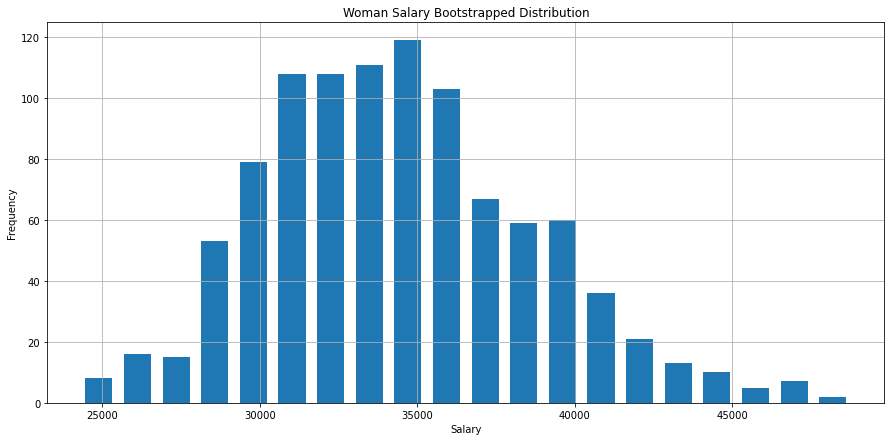

In [18]:
woman_mean = []
for i in range(1000):
    np.random.seed(i)
    sample_set = np.random.choice(df_woman.Q25, size = 248, replace = True)
    woman_mean.append(sample_set.mean())

# Bootstrapped distribution for Women
plt.figure(figsize = (15,7))
plt.hist(woman_mean, bins = 20,rwidth = 0.7)
plt.grid()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Woman Salary Bootstrapped Distribution')
plt.show()

Put together

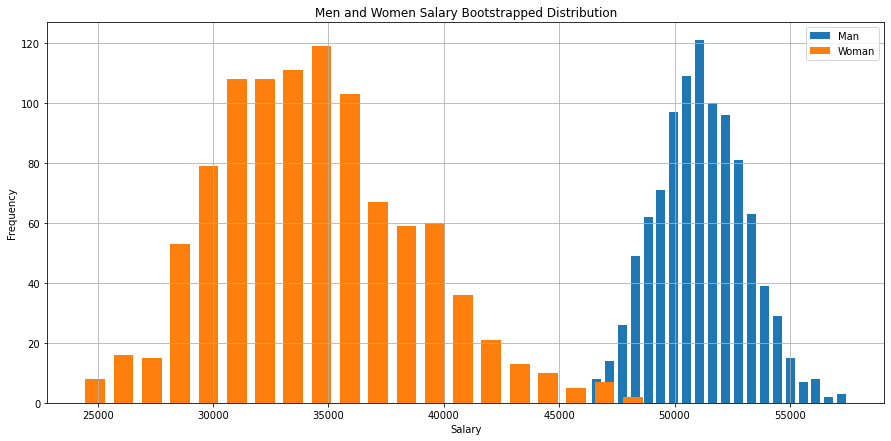

In [19]:
plt.figure(figsize = (15,7))
plt.hist(man_mean, bins = 20,rwidth = 0.7, label = 'Man')
plt.hist(woman_mean, bins = 20,rwidth = 0.7, label = 'Woman')
plt.grid()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Men and Women Salary Bootstrapped Distribution')
plt.legend()
plt.show()

The distribution of the difference in means

In [20]:
difference_mean = pd.Series(man_mean) - pd.Series(woman_mean)

In [21]:
# Compute descriptive statistics
difference_mean.describe()

count     1000.000000
mean     16725.420484
std       4772.513511
min       2000.645161
25%      13737.499194
50%      17062.995161
75%      20016.543548
max      30434.261290
dtype: float64

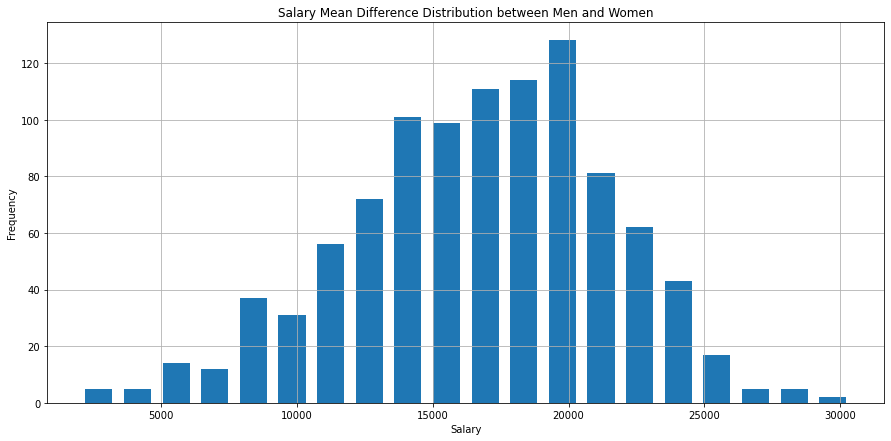

In [22]:
# Plot the histogram
plt.figure(figsize = (15,7))
plt.hist(difference_mean, bins = 20,rwidth = 0.7)
plt.grid()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Mean Difference Distribution between Men and Women')
plt.show()

## d. [0.5pts] If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped data. Explain your rationale.

In [23]:
pd.Series(man_mean).std()

1946.6035371656722

In [24]:
pd.Series(woman_mean).std()

4270.220417623591

All of the Man Salary Bootstrapped Distribution, Woman Salary Bootstrapped Distribution, Salary Mean Difference Distribution between Men and Women roughly follow Normal Distribution. The sizes we choose are reasonable and the results they lead to are valid. And by Central Limit Theorem, we can perform a two-sample t-test on the bootstrapped data.

Theoretically, since we use bootstrapped data, we do not know the standard devision / variance for men and women these two groups. Or we can see from above, both the two groups' and their bootstrapped data's variances are not same (there's a big difference). So we need to set equal_var = False when we do the two-sample t-test. This means that we need to use Welch’s T-test to do the t-test.

In [25]:
tcc, pcc = stats.ttest_ind(man_mean, woman_mean, equal_var = False, alternative='two-sided')
print ("t-test: t = %g  p = %g" % (tcc, pcc))

t-test: t = 112.701  p = 0


We get the p value is 0, so p is less than the thresholf which is 0.05. We can say that the difference observed in the data is most likely not due to chance. And the difference is also present in the unobserved population. 

So, in the case of man and woman salary, we have sufficient proof to say that there exists differences in man and woman salary distributions. It's 
statistically significant. We can reject the null hypothesis (H0: man and woman salary distributions are same)

## e. [1pts] Comment on your findings.

In [26]:
df.Q2.unique()

array(['Man', 'Woman', 'Prefer not to say', 'Nonbinary',
       'Prefer to self-describe'], dtype=object)

After plotting the man and woman's salary distributions, bootstrapped distributions for two groups and the difference in means distribution, and doing the t-test, we can say that men have overall higher salary than women have, in summary.

The bootstrap of data to comparing the mean really helps us find whether there exists a difference between two groups. It can make the distribution into a Normal distribution and then we can perform t-test.

However, we should need or try to gather and clear more information and data. Since we still have other answers in the gender question (Q2), for example some people answer 'Prefer not to say'. We can't use these data in our analysis, but they may have important effect and will affect our results. For example, if we know all the information(know all the gender), we can then use the corresponding salary to analyze. The standard deviation may decrease for each group. And the histogram for each group may be more representative, may even in Normal Distribution,

# “highest level of formal education”

Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e, this time use analysis of variance (ANOVA) instead of t-test for hypothesis testing to compare the means of salary for three groups (Bachelor’s degree, Master’s degree, and Doctoral degree)

## a

In [27]:
df_bachelor = df[['Q4','Q25']].loc[df.Q4 == 'Bachelor’s degree']
df_master = df[['Q4','Q25']].loc[df.Q4 == 'Master’s degree']
df_doctoral = df[['Q4','Q25']].loc[df.Q4 == 'Doctoral degree']

Check wheather there is missing data

In [28]:
print(pd.isnull(df_bachelor).sum())
print(pd.isnull(df_master).sum())
print(pd.isnull(df_doctoral).sum())

Q4     0
Q25    0
dtype: int64
Q4     0
Q25    0
dtype: int64
Q4     0
Q25    0
dtype: int64


So there is no missing data

In [29]:
df_bachelor.describe()

,Q25
count,4777.000000
mean,35578.291815
std,89382.060777
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,40000.000000
max,1000000.000000


Bachelor group:

Size: 4777

Mean: 35578.291815

Standard deviation: 89382.060777

Median: 7500

Max: 1000000

Min: 1000

In [30]:
df_master.describe()

,Q25
count,6799.000000
mean,52706.868657
std,90928.786678
min,1000.000000
25%,3000.000000
50%,25000.000000
75%,70000.000000
max,1000000.000000


Master group:

Size: 6799

Mean: 52706.868657

Standard deviation: 90928.786678

Median: 25000

Max: 1000000

Min: 1000

In [31]:
df_doctoral.describe()

,Q25
count,2217.000000
mean,70641.181777
std,117160.947589
min,1000.000000
25%,4000.000000
50%,40000.000000
75%,90000.000000
max,1000000.000000


Doctoral group:

Size: 2217

Mean: 70641.181777

Standard deviation: 117160.947589

Median: 40000

Max: 1000000

Min: 1000

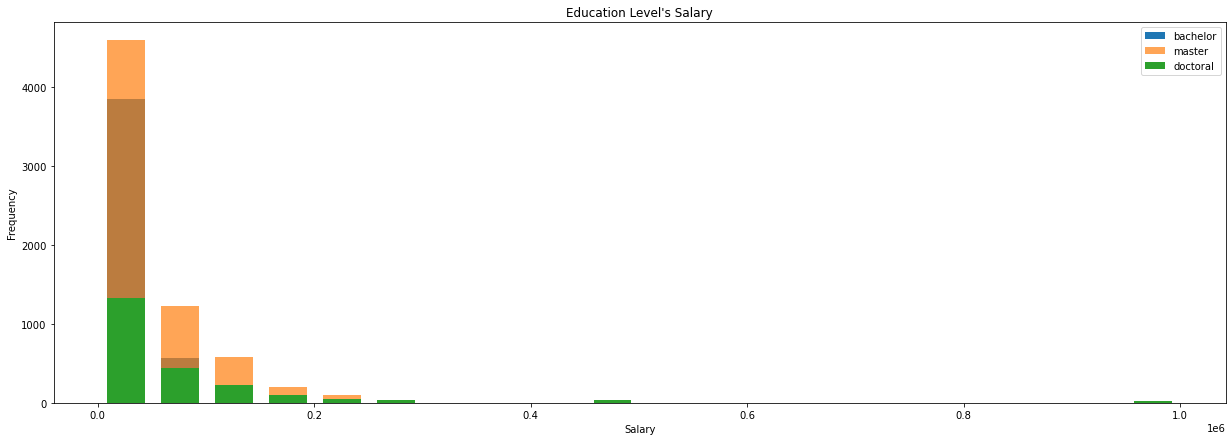

In [32]:
# plot three distributions together in one graph
plt.figure(figsize = (21,7))
plt.hist(df_bachelor.Q25, bins = 20,rwidth = 0.7, label = 'bachelor')
plt.hist(df_master.Q25, bins = 20,rwidth = 0.7, label = 'master', alpha =0.7)
plt.hist(df_doctoral.Q25, bins = 20,rwidth = 0.7, label = 'doctoral')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title("Education Level's Salary")
plt.legend()
plt.show()

In [33]:
mean_list = {'bachelor':df_bachelor.Q25.mean(), 'master':df_master.Q25.mean(),'doctoral':df_doctoral.Q25.mean()}
print(mean_list)

{'bachelor': 35578.29181494662, 'master': 52706.868657155464, 'doctoral': 70641.18177717636}


dotcoral mean > master mean > bachelor mean

In [34]:
median_list = {'bachelor':df_bachelor.Q25.median(), 'master':df_master.Q25.median(), 'doctoral':df_doctoral.Q25.median()}
print(median_list)

{'bachelor': 7500.0, 'master': 25000.0, 'doctoral': 40000.0}


dotcoral median > master median > bachelor median

In [35]:
std_list = {'bachelor':df_bachelor.Q25.std(), 'master':df_master.Q25.std(), 'doctoral':df_doctoral.Q25.std()}
print(std_list)

{'bachelor': 89382.0607767933, 'master': 90928.78667795271, 'doctoral': 117160.94758894051}


dotcoral sd > master sd > bachelor sd

In [36]:
print(df_bachelor.Q25.min(), df_master.Q25.min(), df_doctoral.Q25.min())
print(df_bachelor.Q25.max(), df_master.Q25.max(), df_doctoral.Q25.max())

1000 1000 1000
1000000 1000000 1000000


We can see from the histogram above that all of the bachelor, master, doctoral salary distribution are right-skewed.
When we compare different groups' salary, it is more accurate to use the median value as the comparison standard.

Doctoral's group has largest mean(70641), median(40000) and standard deviation(variance). 
Bachelor's group has smallest mean(35578), median(7500) and standard deviation(variance).
Doctor's group's mean is nearly twice as much as Bachelor's group’s mean.
Doctor's group's median is more than five times than Bachelor's group’s median.

Master's group has the largest number of people (6799). Doctoral group has the smallest number of people (2217).

Doctor's group has overall highest salay. All three groups' salary have same range which equals to 999000(i.e. same minimum and maximum value).

In summary, people who has the higher education level has the higher overall salary.

## b

Analysis of Variance (ANOVA) is a statistical formula used to compare variances across the means (or average) of different groups. A range of scenarios use it to determine if there is any difference between the means of different groups.

The outcome of ANOVA is the ‘F statistic’. This ratio shows the difference between the within group variance and the between group variance, which ultimately produces a figure which allows a conclusion that the null hypothesis is supported or rejected. If there is a significant difference between the groups, the null hypothesis is not supported, and the F-ratio will be larger.

https://www.tibco.com/reference-center/what-is-analysis-of-variance-anova

ANOVA assumptions:

1.The populations from where samples have been drawn should follow a normal distribution.

2.The samples have been selected randomly and independently

3.Each group should have common variance i.e. should be homoscedastic i.e. the variability in the dependent variable values within different groups is equal.

https://www.mygreatlearning.com/blog/analysis-of-variance-anova/#4

From the distribution plot above, we find that all three groups do not have the Normal distribution. So it is not suitable to conduct One-way ANOVA test.

## c

In [37]:
print(df_bachelor.shape)
print(df_master.shape)
print(df_doctoral.shape)

(4777, 2)
(6799, 2)
(2217, 2)


The higher the sample size, the more likely the sample will be representative of the population set. 

Since bachelor and doctoral groups not have a very large size:4777, 2217. It is reasonable that we take 10% of the population as sample size (bachelor sample size: 478, doctor sample size: 222).

Master group has a relative larger size: 6799.
It is reasonable that we take 15% of the population as sample size (sample size : 1019).

In [38]:
bachelor_mean = []
master_mean = []
doctoral_mean = []
for i in range(1000):
    np.random.seed(i) 
    sample_set1 = np.random.choice(df_bachelor.Q25, size = 478, replace = True)
    sample_set2 = np.random.choice(df_master.Q25, size = 1019, replace = True)
    sample_set3 = np.random.choice(df_doctoral.Q25, size = 222, replace = True)
    
    bachelor_mean.append(sample_set1.mean())
    master_mean.append(sample_set2.mean())
    doctoral_mean.append(sample_set3.mean())

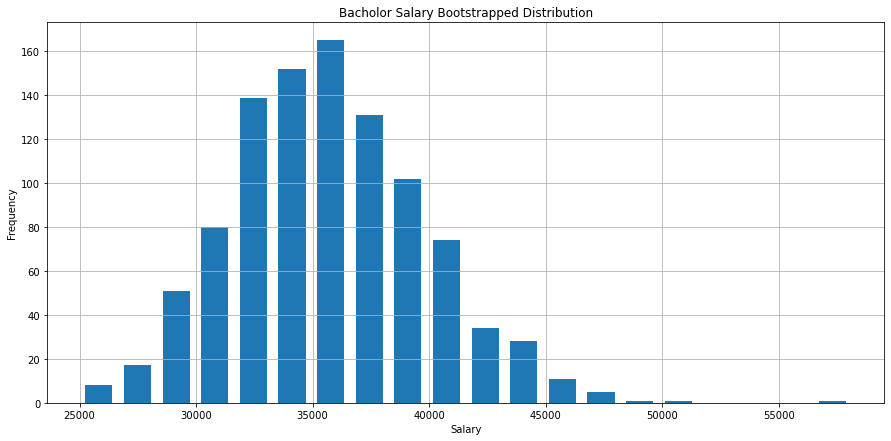

In [39]:
# Bootstrapped distribution for bachelor group
plt.figure(figsize = (15,7))
plt.hist(bachelor_mean, bins = 20,rwidth = 0.7)
plt.grid()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Bacholor Salary Bootstrapped Distribution')
plt.show()

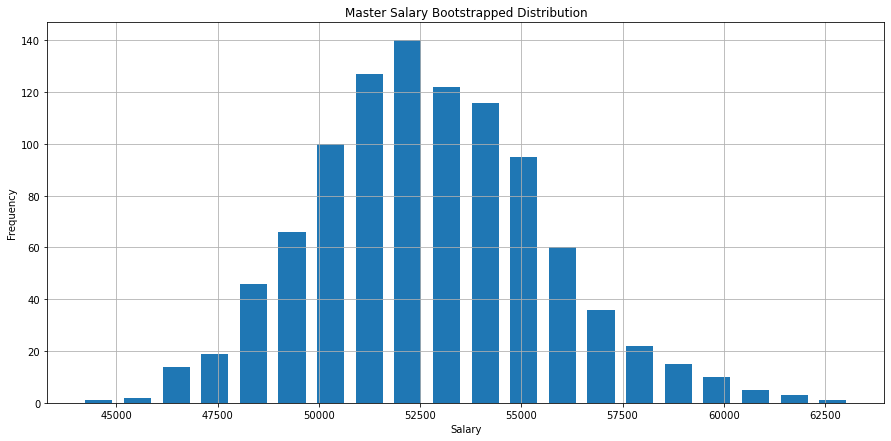

In [40]:
# Bootstrapped distribution for master group
plt.figure(figsize = (15,7))
plt.hist(master_mean, bins = 20,rwidth = 0.7)
plt.grid()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Master Salary Bootstrapped Distribution')
plt.show()

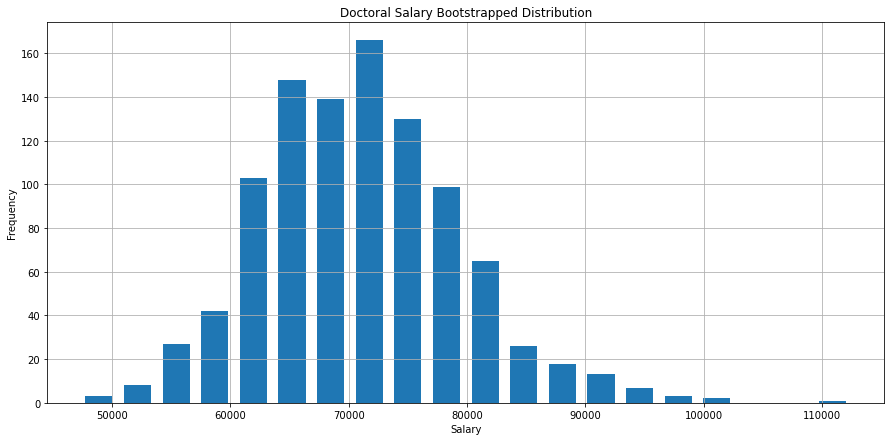

In [41]:
# Bootstrapped distribution for doctor group
plt.figure(figsize = (15,7))
plt.hist(doctoral_mean, bins = 20,rwidth = 0.7)
plt.grid()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Doctoral Salary Bootstrapped Distribution')
plt.show()

Put together

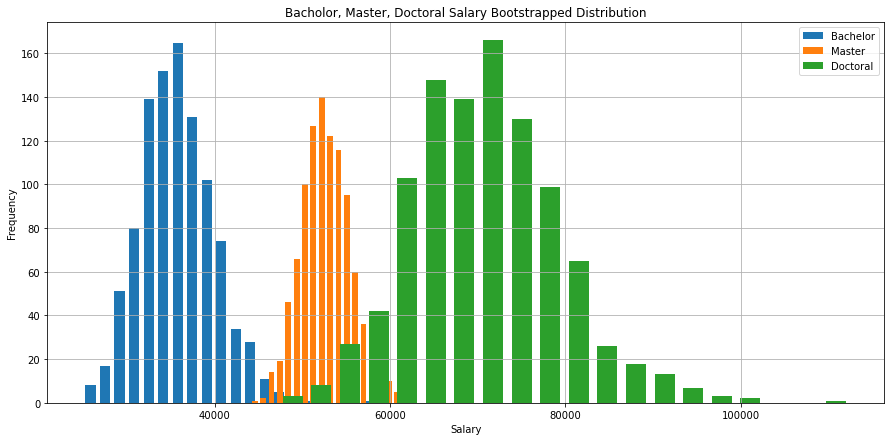

In [42]:
plt.figure(figsize = (15,7))
plt.hist(bachelor_mean, bins = 20,rwidth = 0.7, label = 'Bachelor')
plt.hist(master_mean, bins = 20,rwidth = 0.7, label = 'Master')
plt.hist(doctoral_mean, bins = 20,rwidth = 0.7, label = 'Doctoral')
plt.grid()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Bacholor, Master, Doctoral Salary Bootstrapped Distribution')
plt.legend()
plt.show()

The distribution of the difference in means

In [43]:
difference_mean_bm = pd.Series(master_mean) - pd.Series(bachelor_mean)
difference_mean_bd = pd.Series(doctoral_mean) - pd.Series(bachelor_mean)
difference_mean_md = pd.Series(doctoral_mean) - pd.Series(master_mean)

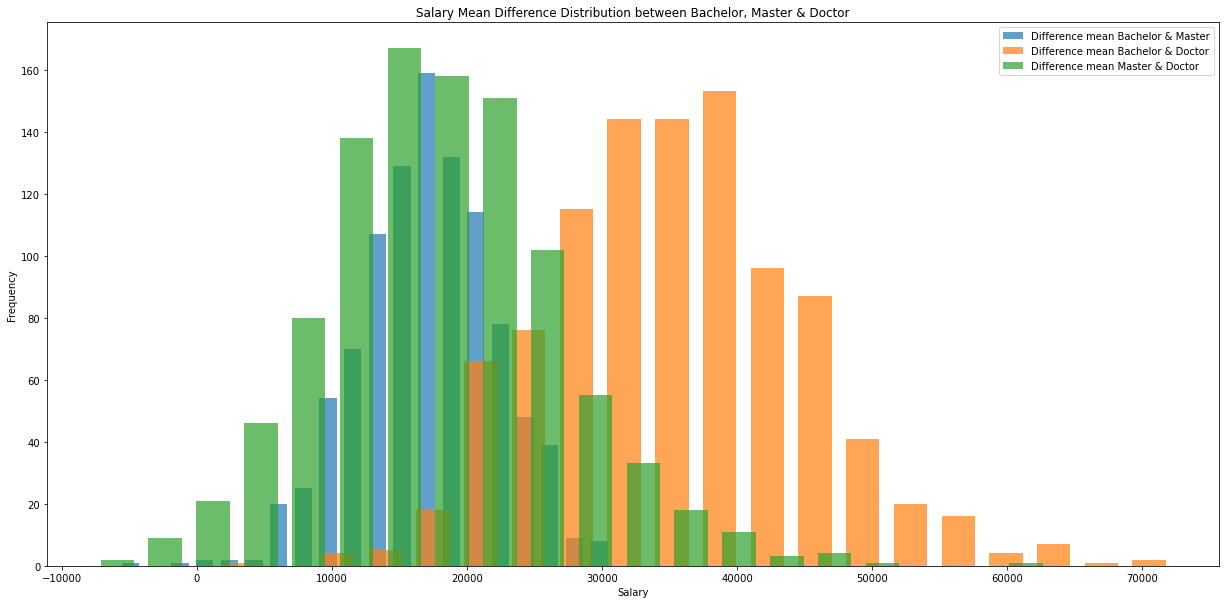

In [44]:
# Plot the histogram
plt.figure(figsize = (21,10))
plt.hist(difference_mean_bm, bins = 20,rwidth = 0.7, label = 'Difference mean Bachelor & Master', alpha =0.7)
plt.hist(difference_mean_bd, bins = 20,rwidth = 0.7, label = 'Difference mean Bachelor & Doctor', alpha =0.7)
plt.hist(difference_mean_md, bins = 20,rwidth = 0.7, label = 'Difference mean Master & Doctor', alpha =0.7)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Mean Difference Distribution between Bachelor, Master & Doctor')
plt.legend()
plt.show()

## d

All of the Bachelor Salary Bootstrapped Distribution, Master Salary Bootstrapped Distribution, Doctoral Salary Bootstrapped Distribution, Salary Mean Difference Distribution between each two groups roughly follow Normal Distribution. The sizes we choose are reasonable and the results they lead to are valid. It obeys the assumptions of ANOVA and by Central Limit Theorem, we can perform the One-way ANOVA test on the bootstrapped data.

In [45]:
f, p = f_oneway(bachelor_mean, master_mean, doctoral_mean)
print('F = %g  p = %g' % (f,p))

F = 9767.4  p = 0


We get the p value is 0, so p is less than the thresholf which is 0.05. We can say that the difference observed in the data is most likely not due to chance. And the difference is also present in the unobserved population. 

So, in the case of bachelor, master and doctoral salary, we have sufficient proof to say that there exist differences in the salary distribution between each two groups of bachelor, master and doctorals group. It's statistically significant. We can reject the null hypothesis (H0: bachelor, master and doctoral salary distributions are same)

## e

In [46]:
df.Q4.unique()

array(['Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'I prefer not to answer', 'No formal education past high school',
       'Some college/university study without earning a bachelor’s degree',
       'Professional doctorate'], dtype=object)

After plotting the bachelor, master and doctoral salary distributions, bootstrapped distributions for each group and the difference in means distribution, and doing the One-way ANOVA test, we can say that people who has the higher education level has the higher overall salary (doctor has the highest salary), in summary.

The bootstrap of data to comparing the mean really helps us find whether there exists a difference between two groups. It can make the distribution into a Normal distribution and then we can perform t-test.


However, we should try to clear more information and data. Since we still have other answers in the gender question (Q2), for example some people answer 'Prefer not to say'. We can't use these data in our analysis, but they may have important effect and will affect our results. For example, if we know all the information(know all people's highest education level), we can then use the corresponding salary to analyze. The standard deviation may decrease for each group. And the histogram for each group may be more representative, may even in Normal Distribution,

In addition, if we want to find the truth among the population, we should try to use more information and data. Many other people have different highest education level. If we add these groups and compare all of them together, we will get a better analysis result and the result will be more representative and accurate. We can also try to use more features together to analyze. For example, we can combine gender and highest education level together and then do the analysis again. Then we'll get more comprehensive results